In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np
import matplotlib.ticker as mtick

# URL del archivo Excel
url_InegiCars = "https://www.inegi.org.mx/contenidos/datosprimarios/iavl/tabulados/8_Ventas_serie.xlsx"

# Leer el archivo Excel desde la URL, comenzando desde la 6ta fila ya que en la quinta están los títulos y la última fila solo es para saber dónde acaba el data set. 
df_CarsMex = pd.read_excel(url_InegiCars, header=5)
ultima_fila = df_CarsMex.iloc[-5]

# Prueba de funionamiento Mostrar las primeras 5 filas del DataFrame
print(df_CarsMex.head())
print(ultima_fila)

                            Tema     Año    Mes  Marca         Modelo  \
0  Venta al público de vehículos  2005.0  Enero  Acura            Mdx   
1  Venta al público de vehículos  2005.0  Enero  Acura             Rl   
2  Venta al público de vehículos  2005.0  Enero  Acura        Tl 3.5l   
3  Venta al público de vehículos  2005.0  Enero   Audi             A3   
4  Venta al público de vehículos  2005.0  Enero   Audi  A4 1.8 Cabrio   

               Tipo Segmento     Origen     País origen Cantidad  
0  Camiones ligeros    SUV's  Importado          Canadá       18  
1       Automóviles  De Lujo  Importado           Japón        4  
2       Automóviles  De Lujo  Importado  Estados Unidos       38  
3       Automóviles  De Lujo  Importado          Brasil       74  
4       Automóviles  De Lujo  Importado        Alemania        9  
Tema           Venta al publico de vehículos
Año                                   2024.0
Mes                                    Marzo
Marca                   

In [15]:
# Convertir la columna 'Cantidad' a tipo numérico 
df_CarsMex['Cantidad'] = pd.to_numeric(df_CarsMex['Cantidad'], errors='coerce') 

# Eliminar filas con valores NaN en la columna 'Cantidad' 
df_CarsMex = df_CarsMex.dropna(subset=['Cantidad']) 

# Create a DataFrame with columns to total: Year, Cantidad
ventas_por_año_df = pd.DataFrame(df_CarsMex.groupby(df_CarsMex["Año"])["Cantidad"].sum())
ventas_por_año_df.reset_index(drop=False, inplace=True)

# Format 'Cantidad' column with commas and no decimals
ventas_por_año_df['Año'] = ventas_por_año_df['Año'].astype(int)
ventas_por_año_df['Cantidad'] = ventas_por_año_df['Cantidad'].astype(int)

# Drop the row corresponding to the year 2024
ventas_por_año_df = ventas_por_año_df.drop(19)
ventas_por_año_df

,Año,Cantidad
0,2005,1131768
1,2006,1139736
2,2007,1099890
3,2008,1025544
4,2009,754925
5,2010,820413
6,2011,905893
7,2012,988042
8,2013,1065098
9,2014,1136965


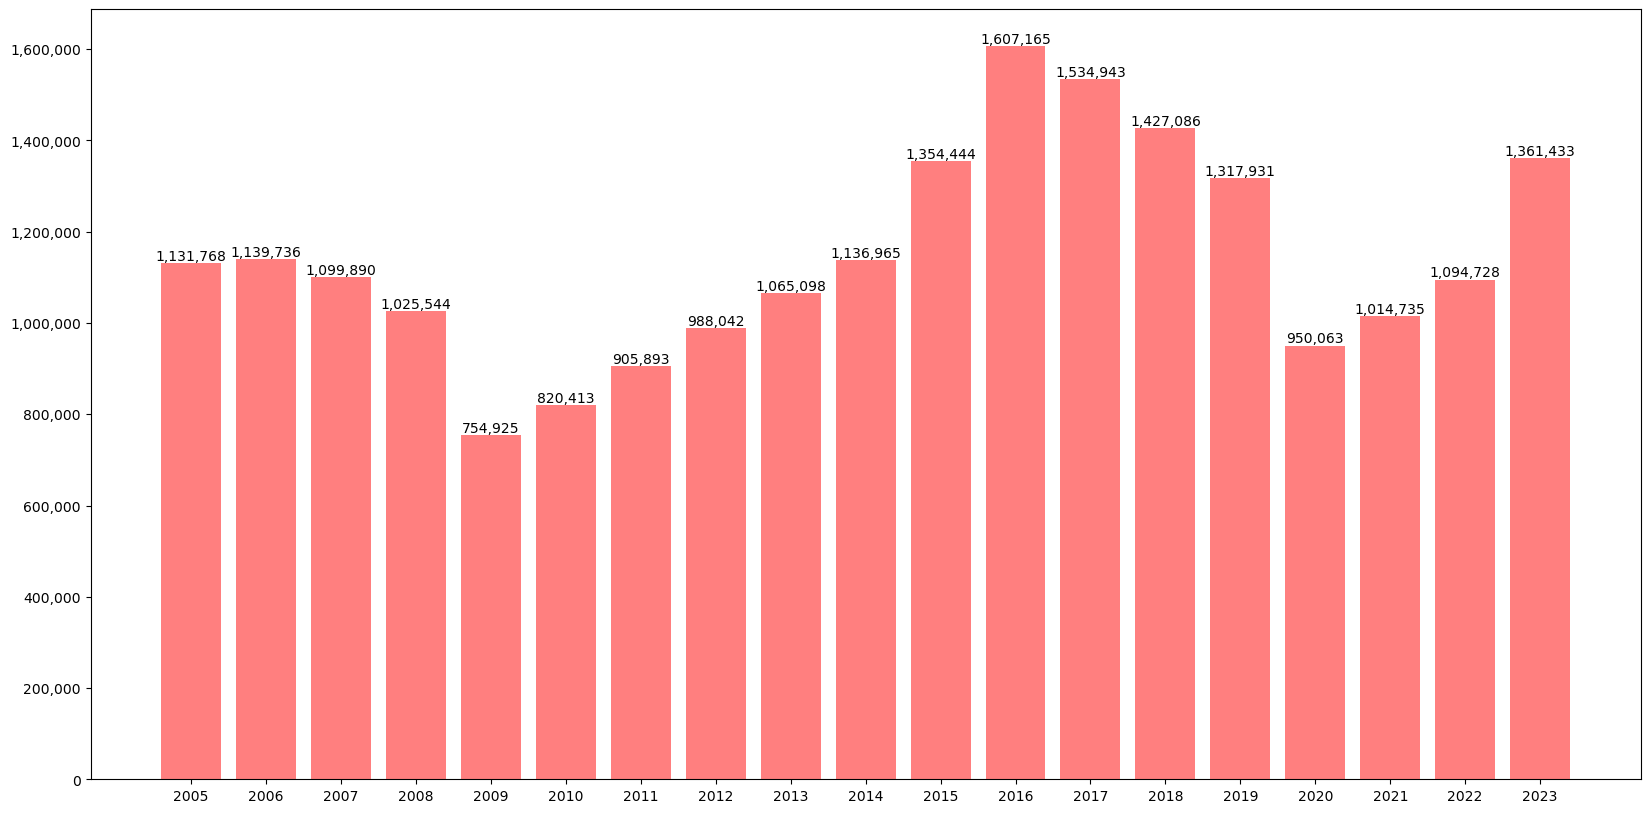

In [21]:
# Set x axis and tick locations
x_axis = np.arange(len(ventas_por_año_df))
tick_locations = [value for value in x_axis]
labels = ventas_por_año_df["Cantidad"]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,10))
bars = plt.bar(x_axis, ventas_por_año_df["Cantidad"], color='r', alpha=0.5, align="center")

# Format y-axis labels with comma separator
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Format labels on bars with comma separator
for bar, label in zip(bars, labels):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,.0f}'.format(label), ha='center', va='bottom')

plt.xticks(tick_locations, ventas_por_año_df["Año"])
plt.show()


In [28]:
# fig, ax = plt.subplots()
# cont=ax.bar(height=ventas_por_año_df['Cantidad'],x=ventas_por_año_df['Año'])
# ax.bar_label(cont, fmt='{:,}')